In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.io as sio

from sklearn.cluster import KMeans

def combine_data_C(data, C):
    data_with_c = data.copy()
    data_with_c['C'] = C
    return data_with_c

rndinten  expinten
0 -0.428760 -1.063740
1 -0.473499  0.825051
2 -0.188865 -1.048164
3  1.577742 -1.049167
4 -0.251285 -1.064646


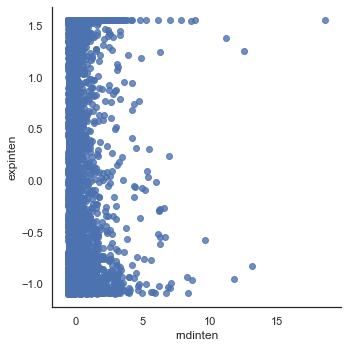

In [6]:
filename = "2001_rnd&expnot0_3f.csv"
data = pd.read_csv(filename)
data2 = pd.DataFrame(data, columns = ['rndinten', 'expinten'])
data2 = (data2-data2.mean())/(data2.std()) 
print(data2.head()) 

sns.set(context="notebook", style="white")
sns.lmplot('rndinten', 'expinten', data=data2, fit_reg=False)
plt.show()

In [7]:
clusternumber = 3
sk_kmeans = KMeans(n_clusters=clusternumber)
sk_kmeans.fit(data2)


##produce cluster label
sk_C = sk_kmeans.predict(data2)

#combine label
data_with_c = combine_data_C(data, sk_C)
data_with_c2 = combine_data_C(data2, sk_C)
#print(data_with_c)

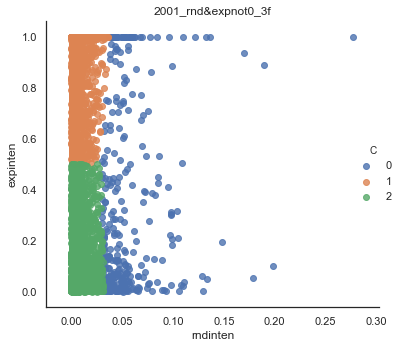

In [9]:
##File Output
outpath = filename.split(".")[0]
data_with_c.to_csv(outpath+"_withcluster"+str(clusternumber)+".csv")

#result plot
sns.lmplot('rndinten', 'expinten', hue='C', data=data_with_c, fit_reg=False)
plt.title(outpath)
plt.tight_layout()
plt.savefig(outpath+"c" +str(clusternumber)+".png", dpi = 500)
plt.show()